Beschrijving van de dataset

Deze dataset is kunstmatig gecreëerd en richt zich op het voorspellen van landbouwoogsten. Het simuleert omstandigheden op basis van diverse milieu- en managementfactoren. Het doel is het bieden van een oefenomgeving voor het ontwikkelen van voorspellende modellen in de context van landbouw, machine learning en regressieanalyse.

Dit Python-script maakt gebruik van de pandas-bibliotheek om de gegevens in te lezen vanuit het CSV-bestand genaamd "agricultural_yield_train.csv". De gegevens worden opgeslagen in de variabele `ay_data`. Door de `head()`-functie te gebruiken, worden de eerste paar rijen van de dataset weergegeven. Dit geeft een snel overzicht van de structuur en inhoud van de gegevens.

In [1]:
import pandas as pd

ay_data = pd.read_csv("../csv/agricultural_yield_train.csv")
ay_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


Dit Python-script bereidt gegevens voor machine learning voor door features (`X`) en een targetvariabele (`y`) te definiëren. De features worden gedefinieerd als alle kolommen behalve `"Seed_Variety"` in het DataFrame `ay_data`, en de targetvariabele (`y`) wordt ingesteld op de kolom `"Seed_Variety"`.

In [2]:
X = ay_data.drop(["Seed_Variety"], axis=1)
y = ay_data["Seed_Variety"]

X, y

(       Soil_Quality  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
 0         96.415657                        147.853040   94.593926   
 1         92.352626                        281.565396   90.504644   
 2         63.714785                        137.864940   97.329340   
 3         90.084256                        100.946659  113.404828   
 4         81.600341                        223.088908   83.048176   
 ...             ...                               ...         ...   
 15995     77.053550                        154.189768  103.115855   
 15996     99.795631                        282.295839  123.598354   
 15997     67.478487                        120.017122  102.308627   
 15998     85.176890                        247.847389  114.956634   
 15999     87.838280                        244.216536   98.313738   
 
        Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
 0       444.267569                    3            683.759119  
 1       517.585491         

Dit Python-script maakt gebruik van de `train_test_split`-functie uit de scikit-learn bibliotheek om een dataset op te splitsen in training- en testsets. De features (`X`) en de bijbehorende targetvariabele (`y`) worden als invoer gegeven. De resulterende datasets, `X_train`, `X_test`, `y_train`, en `y_test`, worden gebruikt voor het trainen en evalueren van de modellen. De parameter `test_size=0.2` geeft aan dat 20% van de gegevens wordt toegewezen aan de testset, terwijl 80% wordt gebruikt voor training. De parameter `random_state=0` zorgt voor reproduceerbaarheid van de splitsing. Met toevoeging van `stratify=y` wordt de parameter `stratify` toegepast, wat betekent dat de verdeling van klassen in de targetvariabele (`y`) behouden blijft in zowel de training- als de testset. Dit is vooral relevant bij classificatietaken met ongebalanceerde datasets, waarbij het behoud van dezelfde klasseverdeling in beide sets belangrijk is om de representativiteit van de data te waarborgen.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Dit codeblok voert een grid search uit om de beste hyperparameters te vinden voor een neuraal netwerkmodel. Het zoekt de optimale combinatie van verborgen laaggroottes, activatiefuncties en optimalisatiealgoritmen door middel van 5-voudige cross-validatie. Het beste model en de bijbehorende hyperparameters worden opgeslagen voor verdere evaluatie en gebruik.

**DIT CODE BLOK RUNT DE EERSTE KEER 5 MIN**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

model_nn = MLPClassifier(random_state=0)

grid_search_nn = GridSearchCV(estimator=model_nn, param_grid=param_grid, cv=5)

grid_search_nn.fit(X_train, y_train)

best_params_nn = grid_search_nn.best_params_

best_model_nn = grid_search_nn.best_estimator_


Deze code lijn maakt gebruik van het eerder getrainde Random Forest-classificatiemodel (`best_model_nn`) om voorspellingen te doen op de testdataset (`X_test`). De resulterende voorspellingen worden opgeslagen in de variabele `y_pred_nn`. Het doel is om de prestaties van het Random Forest-model te evalueren door de voorspellingen te vergelijken met de echte labels van de testdataset.

In [5]:
y_pred_nn = best_model_nn.predict(X_test)
y_pred_nn

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Dit codeblok voert een iteratieve evaluatie uit van de nauwkeurigheid van neurale netwerkmodellen voor verschillende combinaties van hyperparameters. Het doorloopt alle mogelijke combinaties van verborgen laaggroottes, activatiefuncties en optimalisatiealgoritmen en berekent de nauwkeurigheid van elk model op de testset. Vervolgens wordt het beste model geïdentificeerd op basis van de hoogste nauwkeurigheid en worden de beste hyperparameters en de bijbehorende nauwkeurigheid weergegeven.

**DIT CODE BLOK RUNT DE EERSTE KEER 1 MIN**


In [6]:
from sklearn.metrics import accuracy_score

for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
    for activation in param_grid['activation']:
        for solver in param_grid['solver']:
            model_nn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, random_state=0)
            model_nn.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, model_nn.predict(X_test))
            print(f"Accuracy for hidden_layer_sizes={hidden_layer_sizes}, activation={activation}, solver={solver}: {accuracy}")

best_accuracy_nn = accuracy_score(y_test, best_model_nn.predict(X_test))
print("----------------------------------------------------------------------")
print(f"Best hyperparameters for Neural Network: {best_params_nn}")
print(f"Accuracy of best Neural Network model: {best_accuracy_nn}")

Accuracy for hidden_layer_sizes=(64,), activation=relu, solver=adam: 0.9965625
Accuracy for hidden_layer_sizes=(64,), activation=relu, solver=sgd: 0.9159375
Accuracy for hidden_layer_sizes=(64,), activation=tanh, solver=adam: 0.9978125
Accuracy for hidden_layer_sizes=(64,), activation=tanh, solver=sgd: 0.8784375
Accuracy for hidden_layer_sizes=(128,), activation=relu, solver=adam: 0.9965625
Accuracy for hidden_layer_sizes=(128,), activation=relu, solver=sgd: 0.9434375
Accuracy for hidden_layer_sizes=(128,), activation=tanh, solver=adam: 0.998125
Accuracy for hidden_layer_sizes=(128,), activation=tanh, solver=sgd: 0.8940625
Accuracy for hidden_layer_sizes=(64, 64), activation=relu, solver=adam: 0.9965625
Accuracy for hidden_layer_sizes=(64, 64), activation=relu, solver=sgd: 0.905625
Accuracy for hidden_layer_sizes=(64, 64), activation=tanh, solver=adam: 0.9978125
Accuracy for hidden_layer_sizes=(64, 64), activation=tanh, solver=sgd: 0.8840625
Accuracy for hidden_layer_sizes=(128, 128), 

Dit codeblok genereert een staafdiagram dat de structuur van het beste neurale netwerkmodel visualiseert. De x-as vertegenwoordigt de verborgen lagen van het neurale netwerk, terwijl de y-as het aantal neuronen in elke verborgen laag aangeeft. De plot biedt een overzicht van hoe het neurale netwerk is opgebouwd, wat nuttig kan zijn voor het begrijpen van de complexiteit en architectuur van het model.

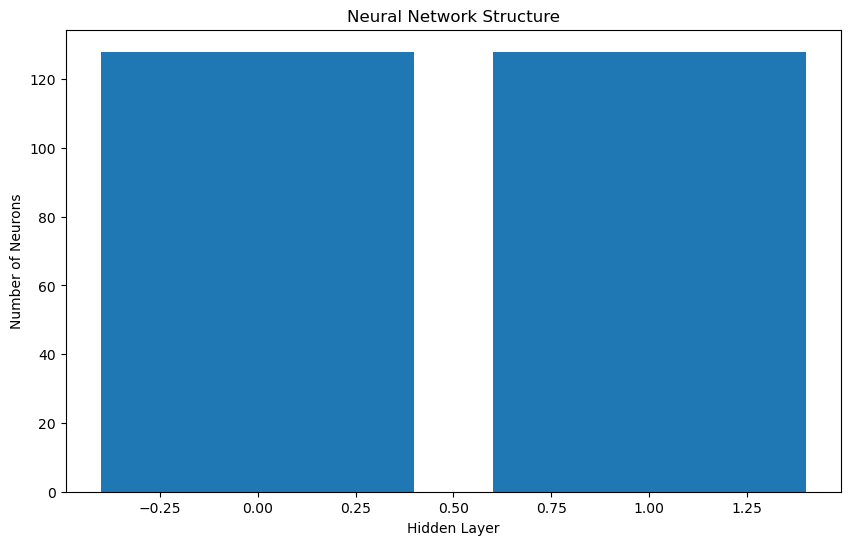

In [8]:
import matplotlib.pyplot as plt

best_hidden_layer_sizes = best_model_nn.hidden_layer_sizes

plt.figure(figsize=(10, 6))
plt.bar(range(len(best_hidden_layer_sizes)), best_hidden_layer_sizes)
plt.xlabel("Hidden Layer")
plt.ylabel("Number of Neurons")
plt.title("Neural Network Structure")
plt.show()

Conclusie

De analyse van de dataset en de ontwikkeling van voorspellende modellen hebben enkele belangrijke inzichten opgeleverd

De nauwkeurigheid van het beste neuraal netwerkmodel suggereert dat het model goed in staat is om landbouwoogsten te voorspellen op basis van de beschikbare kenmerken.

De visualisatie van de neurale netwerkstructuur biedt inzicht in de architectuur van het model, wat kan helpen bij het begrijpen van de complexiteit en de manier waarop het model informatie verwerkt.

Het grid search-proces voor hyperparameter tuning benadrukt het belang van het selecteren van de juiste combinatie van hyperparameters voor het optimaliseren van modelprestaties.